In [5]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns

In [6]:
xls = pd.ExcelFile('/content/EastWestAirlines.xlsx')

In [7]:
air = pd.read_excel(xls,'data')
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
air.shape

(3999, 12)

In [9]:
# Normalization function 
def norm_func1(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
# Normalized data frame (considering the numerical part of data)
df_norm1 = norm_func1(air.iloc[:,1:])
df_norm1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram

In [12]:
z1 = linkage(df_norm1, method="complete",metric="euclidean")

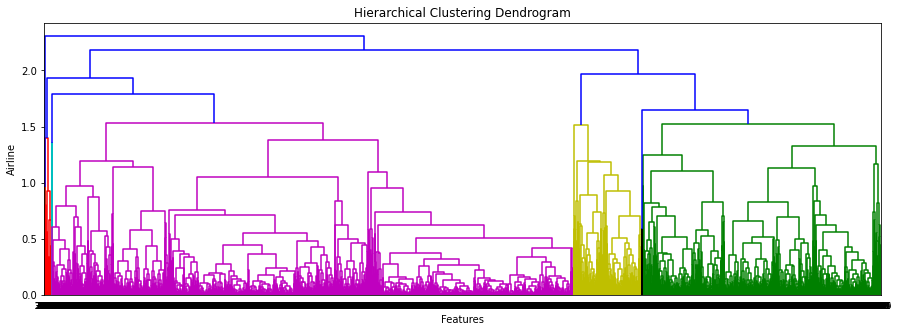

In [13]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Airline')
sch.dendrogram(z1,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [14]:
air.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [15]:
# screw plot or elbow curve #
k1 = list(range(2,20))
#k

In [24]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [28]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k1:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm1)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm1.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm1.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x7f77ebc98290>,
 <a list of 18 Text major ticklabel objects>)

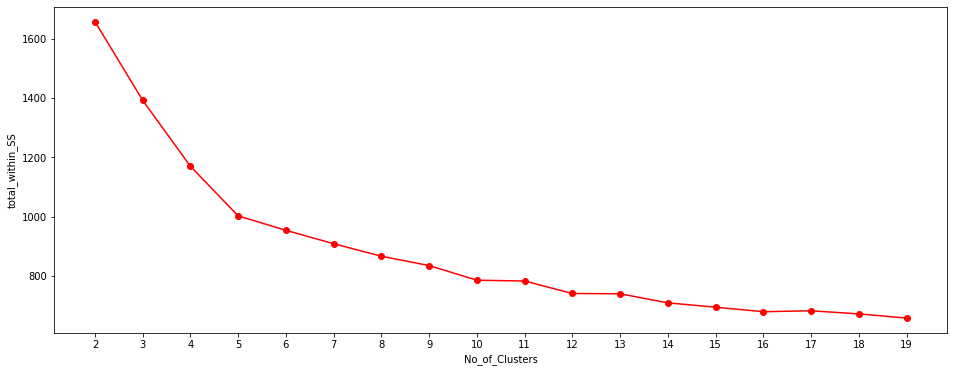

In [29]:
# Scree plot 

plt.figure(figsize=(16,6))
plt.plot(k1,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k1)

In [30]:
X1 = air[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']]
clusters = KMeans(4)  # 4 clusters!
clusters.fit( X1 )
clusters.cluster_centers_
clusters.labels_
air['air_clusters'] = clusters.labels_
air.head()
air.sort_values(by=['air_clusters'],ascending = True)
X1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [31]:
stats1 =air.sort_values("Days_since_enroll", ascending=True)
stats1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,air_clusters
3697,3720,972,972,1,1,1,0,0,0,0,2,0,0
3696,3719,862,0,1,1,1,0,0,0,0,8,0,0
3722,3745,3230,0,1,1,1,0,0,0,0,10,0,0
3725,3748,2627,0,1,1,1,0,0,0,0,25,0,0
3747,3770,6015,4929,1,1,1,0,0,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,416,620498,0,5,1,1,25395,53,1750,14,8296,1,2
409,415,10732,0,1,1,1,1296,6,0,0,8296,0,0
408,414,5581,0,1,1,1,0,0,0,0,8296,0,0
415,421,109087,0,2,1,1,10462,16,0,0,8296,1,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


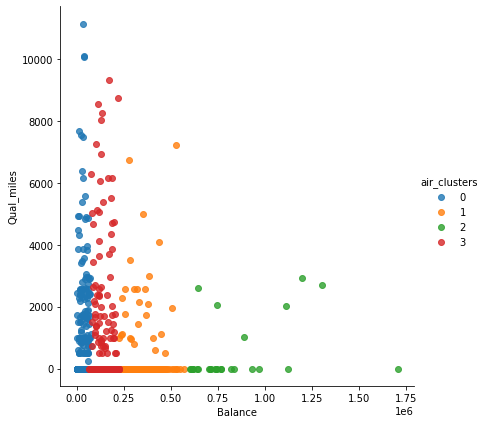

In [32]:
# Plot between pairs Balance~Qual_miles
sns.lmplot( 'Balance','Qual_miles',  data=air,
        hue = 'air_clusters',
        fit_reg=False, size = 6 );

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


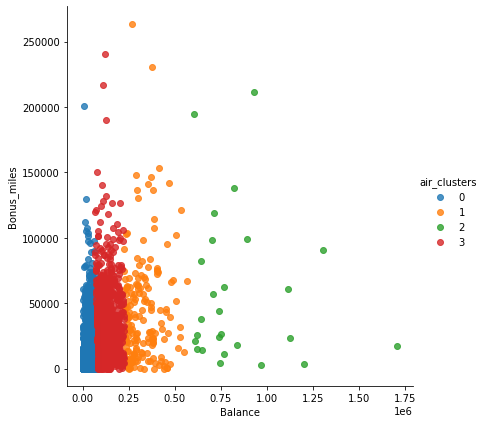

In [33]:
# Plot between pairs Balance~Bonus_miles
sns.lmplot( 'Balance','Bonus_miles',  data=air,
        hue = 'air_clusters',
        fit_reg=False, size = 6 );

In [34]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model1=KMeans(n_clusters=4) 
model1.fit(df_norm1)

KMeans(n_clusters=4)

In [35]:
model1.labels_ # getting the labels of clusters assigned to each row

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [36]:
array([1, 1, 1, ..., 3, 1, 1])

array([1, 1, 1, Ellipsis, 3, 1, 1], dtype=object)

In [37]:
model1.cluster_centers_

array([[ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01,  7.21644966e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -2.77555756e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00]])